In [1]:
from rnns import RNN_completed, RNN_stupid
import numpy as np
from utils import create_datasets, generate_dataset, sequences_to_dicts, train, one_hot_encode_sequence
%matplotlib inline

In [2]:
sequences = generate_dataset()
training_set, validation_set, test_set = create_datasets(sequences)
word_to_idx, idx_to_word, num_sequences, vocab_size = sequences_to_dicts(sequences)

# Hyper-parameters
num_epochs = 600
hidden_size = 50
lr = 0.001

# Initialize a new network
rnn = RNN_completed(hidden_size=hidden_size, vocab_size=vocab_size)



Epoch 0, training loss: 5.3724269417442265, validation loss: 14.083258780736397

Epoch 25, training loss: 1.276122536089805, validation loss: 1.4634791099764906

Epoch 50, training loss: 1.0589003639970926, validation loss: 1.387429892081999

Epoch 75, training loss: 0.9739525551218498, validation loss: 1.3501574418244124

Epoch 100, training loss: 0.9427671023937316, validation loss: 1.317520255072987

Epoch 125, training loss: 0.966092918675509, validation loss: 1.2852132392157736

Epoch 150, training loss: 0.9629729097652098, validation loss: 1.254547957330872

Epoch 175, training loss: 0.9495334776820112, validation loss: 1.2058264897165791

Epoch 200, training loss: 0.9372880610300433, validation loss: 1.0804540628651063

Epoch 225, training loss: 0.9249365861916061, validation loss: 1.1089723355139935

Epoch 250, training loss: 0.89042595208641, validation loss: 1.108326835528909

Epoch 275, training loss: 0.8504241343825619, validation loss: 1.0751733664629841

Epoch 300, train

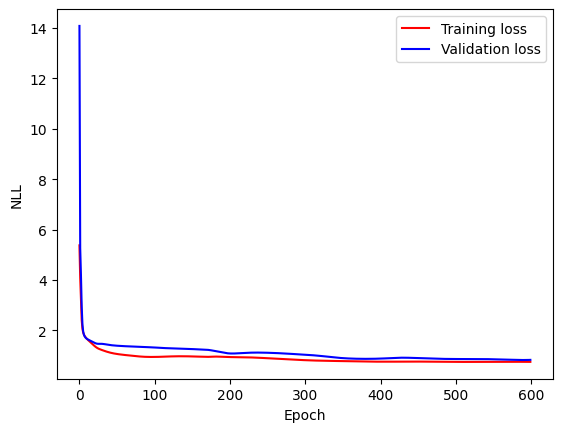

In [3]:
train(rnn, num_epochs, validation_set, training_set, test_set, idx_to_word, word_to_idx, vocab_size, lr)

In [6]:
# Get first sentence in test set
inputs, targets = test_set[6]

# One-hot encode input and target sequence
inputs_one_hot = one_hot_encode_sequence(inputs, vocab_size, word_to_idx)
targets_one_hot = one_hot_encode_sequence(targets, vocab_size, word_to_idx)

# Initialize hidden state as zeros
hidden_state = np.zeros((rnn.hidden_size,1))

# Forward pass
outputs, hidden_states = rnn(inputs_one_hot)
output_sentence = [idx_to_word[np.argmax(output)] for output in outputs]
print('Input sentence:')
print(inputs)

print('\nTarget sequence:')
print(targets)

print('\nPredicted sequence:')
print([idx_to_word[np.argmax(output)] for output in outputs])

Input sentence:
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e']

Target sequence:
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'EOS']

Predicted sequence:
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'EOS', 'EOS']
